### 선형으로 분리되는 데이타 실습하기

In [10]:
import sys, os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split

#### Custom Funtion Definition

In [24]:
red_RGB = (1, 0, 0)
blue_RGB = (0, 0, 1)
data_colors = [red_RGB, blue_RGB]

def read_points_file(filename):
    points = []
    with open(filename, "r") as f:
        for point in f:
            point = point.strip("\n").split()
            points.append([float(point[0]), float(point[1])])
    return points

def read_data(class_0_file, class_1_file):
    points_label0 = read_points_file(class_0_file)
    points_label1 = read_points_file(class_1_file)
    points = points_label0 + points_label1
    points = np.array(points)
    
    label0, label1 = [0], [1]
    num_of_label0, num_of_label1 = len(points_label0), len(points_label1)
    labels = label0 * num_of_label0 + label1 * num_of_label1
    
    return (points, labels)



def get_colors(y):
    return [data_colors[label] for label in y]

def plot_data(X_train, y_train, X_test, y_test):
  
    X = np.concatenate((X_train, X_test)) #concatenate 배열을 하나로 합침
    y = np.concatenate((y_train, y_test))

    colors = get_colors(y)
    colors_train = get_colors(y_train)
    colors_test = get_colors(y_test)

    plt.figure(figsize=(8, 4))

    # Plot all data plot
    plt.subplot(131)
    plt.axis('equal')
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=10, edgecolors=colors)
    plt.title("Data (100%)")


    # training data plot
    plt.subplot(132)
    plt.axis('equal')
    #plt.axis('off')
    plt.scatter(X_train[:, 0], X_train[:, 1], c = colors_train, s = 10, edgecolors=colors_train)
    plt.title("Training Data (80%)")

    # testing data plot
    plt.subplot(133)
    plt.axis('equal')
    #plt.axis('off')
    plt.scatter(X_test[:, 0], X_test[:, 1], c = colors_test, s = 10, edgecolors=colors_test)
    plt.title("Test Data (20%)")
    plt.tight_layout()
    plt.show()

def plot_decision_function(X_train, y_train, X_test, y_test, clf):
    plt.figure(figsize=(8, 4))
    plt.subplot(121)
    plt.title("Training data")
    plot_decision_function_helper(X_train, y_train, clf)
    plt.subplot(122)
    plt.title("Test data")
    plot_decision_function_helper(X_test, y_test, clf, True)
    plt.show()

def plot_decision_function_helper(X, y, clf, show_only_decision_function = False):

    colors = get_colors(y)
    plt.axis('equal')
    plt.tight_layout()
    #plt.axis('off')

    plt.scatter(X[:, 0], X[:, 1], c=colors, s=10, edgecolors=colors)
    ax = plt.gca()  ## get current axes
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T # xy.shape = (900, 2)   ## ravel()은 flatten() 함수
    Z = clf.decision_function(xy).reshape(XX.shape)
    # clf.decision_function(xy).shape = (900,)
    # Z.shape = (30, 30)

    if  show_only_decision_function:
    # Plot decision boundary
        ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
                 linestyles=['-'])
    else :
    # Plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                 linestyles=['--', '-', '--'])

#### 1. DataLoader

In [9]:
'''
SVM 알고리즘을 실습하기 위해서 
노이즈(noise)가 전혀 없는 아주 깔끔하게 선형구분이 가능한 점들의 데이타


'''

#지도학습
X, labels = read_data("../data/points_class_0.txt", "../data/points_class_1.txt")
print(labels) #라벨
#print(X) #좌표값(특성)

#sklearn에서 제공하는 데이터들의 특징 : 데이터들이 안섞여 있다 
# -> 데이터를 섞어 줘야함.. 전처리에서 필수 과정(Data Split)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


#### 2. Data Split

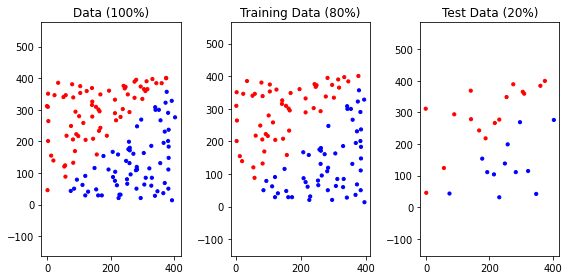

In [14]:
#Split data to train and test on 80-20 ratio
'''
1) 데이터 섞기.. 랜덤하게 원래 들어있는 데이터를 섞는 기능(학습을 위해서는 데이터가 섞여 있어야함)
train machine과 test machine을 학습하기 위한 데이터를 나눈다.
2) train data | test data를 잘 나눈다. 보통 75:25 
3) 1),2)의 역할을 수행하기 위하여 sklearn.model_selection 모듈의 train_test_split 함수를 사용한다.
'''

# 할당하는 변수는 반드시 아래와 동일한 순서로 받아줘야 한다.
# X : feature, y : label
# test_size : test date에 할당할 data 비율. default는 25
X_train,X_test,y_train,y_test=train_test_split(X, labels, test_size=0.2, random_state=0) #random_state는 seed와 비슷한 기능의 값
# print(y_train)
# print("*"*30)
# print(y_test)

#Plot Data
#test data는 학습을 끝내고 확인할때 사용하는 data이다.
plot_data(X_train, y_train, X_test, y_test)

#### 3. Model Generator and Training

In [15]:
#모델 생성
clf=svm.SVC(kernel='linear') #선형으로 단순하게 분리..default도 linear

#학습 fit()
clf.fit(X_train, y_train)

SVC(kernel='linear')

#### 4. Predict and Accuracy Score

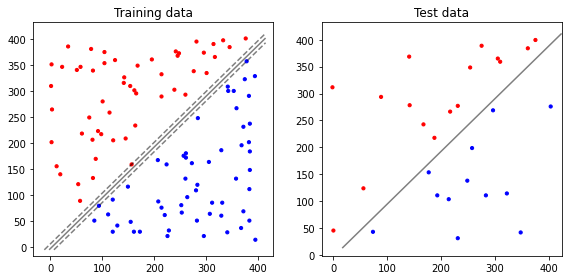

[0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0]
******************************
[0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]


In [17]:
#Train(학습)이 잘되었는지를 확인하려면 test 데이터를 집어넣어서 예측해보아야 한다.
#predict(), Feature만 넣어야 한다. -> 결과는 label

#예측값 생성
clf_predict = clf.predict(X_test)
plot_decision_function(X_train, y_train, X_test, y_test, clf)
#print(clf.score(X_test, y_test)*100)

#예측값과 결과 정확도 비교
print(clf_predict)
print('*'*30)
print(y_test)

### 선형으로 분리되지 않는 데이타 실습하기
 : 노이즈가 있는 data

In [ ]:
'''
이제는 조금 복잡한 data
Noise가 많이 끼어있는 데이타를 의미
이럴때는 Cost파라미터값을 사용해서 Decision Boundary를 조절할 수 있다.
'''

#### 1.Data Loader

In [20]:
X, labels = read_data("../data/points_class_0_nonLinear.txt", "../data/points_class_1_nonLinear.txt")

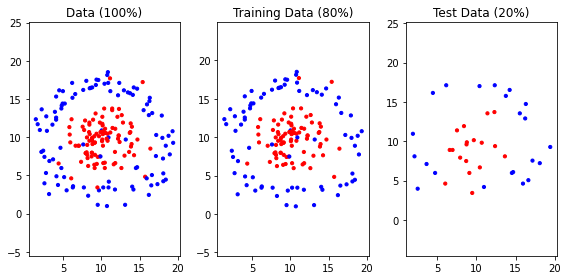

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=0)
plot_data(X_train, y_train, X_test, y_test)

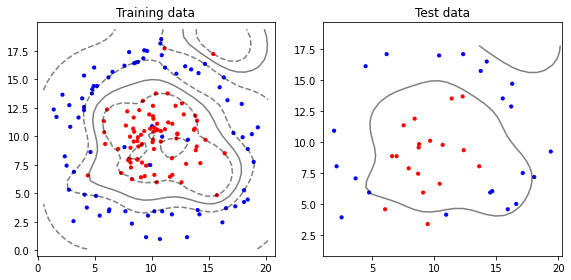

In [27]:
'''
위 그래프에서 보여지는 데이타인 경우
선형으로 분리되지 않고 빨간점 지점의 차원을 높여서 분리시켜야 한다.
이럴때 가우시안 방사 기저함수를 사용한다(rbf).
kernal = 'linear' | 'rbf'

노이즈가 많을 때는 2가지 변수를 같이 써준다.
C : Cost값, gamma 
'''

clf = svm.SVC(C=10.0, kernel='rbf', gamma=0.1)
#clf = svm.SVC(C=1.0, kernel='rbf', gamma=10.0)
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

plot_decision_function(X_train, y_train, X_test, y_test, clf)


In [ ]:
'''
Processing
1. Mdule Configuration
2. Data Loader
3. Data Split...train_test_split()
4. Model Generator
5. Training...fit()
6. Predict....predict()
'''

### GridSearchCV

Fitting 5 folds for each of 20 candidates, totalling 100 fits


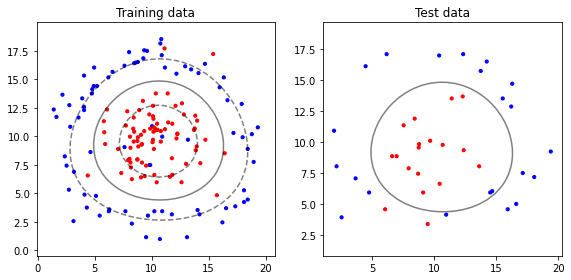

Best Parameters : 
 {'C': 1, 'gamma': 0.01}
Best Estimators : 
 SVC(C=1, gamma=0.01)


In [37]:
'''
GridSearchCV
cost, gamma 같은 변수에 지정될 수 있는 여러개의 값들을
그리드란 모양으로 다 Search해 보겠다는 의미이다.
교차검증을 통해서 최적의 파라미터를 찾는다.

Cost, gamma의 역할을 찾아보자
'''
from sklearn.model_selection import GridSearchCV
#dictionary에 c:[], gamma:[] 키와 키에대한 리스트를 저장하기 좋기 때문에 Dictionary 사용한다.
param_grid = {'C':[0.1, 1, 10, 100], 'gamma':[1, 0.1, 0.01, 0.001, 10]}
clf_grid=GridSearchCV(svm.SVC(), param_grid, verbose=1)

clf_grid.fit(X_train, y_train)

#c_jobs : cpu의 core 갯수를 지정, default는 1이다.

plot_decision_function(X_train, y_train, X_test, y_test, clf_grid)

#best cost값과 gamma값이 무엇일지 알아보자
print("Best Parameters : \n", clf_grid.best_params_)
#Estimators는 모델까지 같이 확인할때이다, 
print("Best Estimators : \n", clf_grid.best_estimator_)